In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Fais apparaitre l'ensemble des informations
pd.set_option("display.max_rows", 5000)
pd.set_option("display.max_column", 70)
pd.set_option("display.max_colwidth", 100)

In [3]:
# Import du dataset nettoyé
data = pd.read_csv('../Datasets/Exoplanets_cleaned.csv')
data.head()

,Planet Name,Host Name,Number of Stars in System,Number of Planets in System,Discovery Method,Discovery Year,Controversial Flag,Orbital Period,Semi-Major Axis,Planet Earth Radius,Planet Jupiter Radius,Planet Earth Mass,Planet Jupiter Mass,Insolation Flux,Equilibrium Temperature,Stellar Effective Temperature,Stellar Radius,Stellar Mass,Distance
0,11 Com b,11 Com,2,1,Radial Velocity,2007,0,326.03000,1.29,NaN,NaN,6165.6000,19.40,NaN,NaN,4742.0,19.00,2.70,93.1846
1,11 UMi b,11 UMi,1,1,Radial Velocity,2009,0,516.21997,1.53,NaN,NaN,4684.8142,14.74,NaN,NaN,4213.0,29.79,2.78,125.3210
2,14 And b,14 And,1,1,Radial Velocity,2008,0,185.84000,0.83,NaN,NaN,1525.5000,4.80,NaN,NaN,4813.0,11.00,2.20,75.4392
3,14 Her b,14 Her,1,2,Radial Velocity,2002,0,1773.40002,2.93,NaN,NaN,1481.0878,4.66,NaN,NaN,5338.0,0.93,0.90,17.9323
4,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996,0,798.50000,1.66,NaN,NaN,565.7374,1.78,NaN,NaN,5750.0,1.13,1.08,21.1397


# Analyse univariée et bivariée

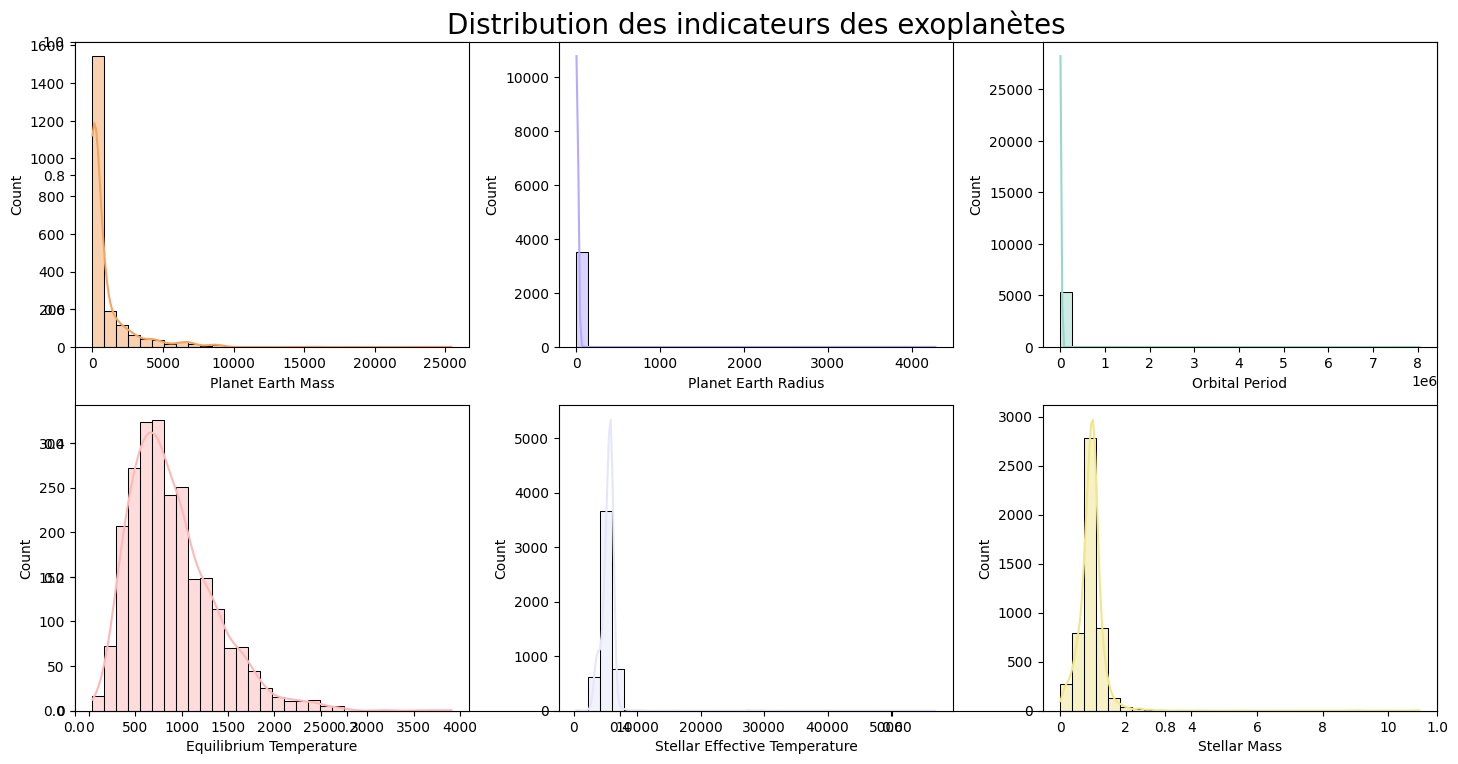

In [4]:
# 13- Tracer la distribution de chaque indicateur
plt.figure(figsize=(15, 8))
plt.title("Distribution des indicateurs des exoplanètes", fontsize=20)

plt.subplot(2, 3, 1)
sns.histplot(data=data, x='Planet Earth Mass', kde=True, bins=30, color='#F4A460')

plt.subplot(2, 3, 2)
sns.histplot(data=data, x='Planet Earth Radius', kde=True, bins=30, color='#B8A9FF')

plt.subplot(2, 3, 3)
sns.histplot(data=data, x='Orbital Period', kde=True, bins=30, color='#98D8C8')

plt.subplot(2, 3, 4)
sns.histplot(data=data, x='Equilibrium Temperature', kde=True, bins=30, color='#FFB8B8')

plt.subplot(2, 3, 5)
sns.histplot(data=data, x='Stellar Effective Temperature', kde=True, bins=30, color='#E6E6FA')

plt.subplot(2, 3, 6)
sns.histplot(data=data, x='Stellar Mass', kde=True, bins=30, color='#F0E68C')

plt.tight_layout()
plt.show()

**Commentaire:** On observe que les distributions sont très concentrées près de zéro donc pour mieux analyser la majorité des données, on peut appliquer un filtre sur le 95ème percentile !

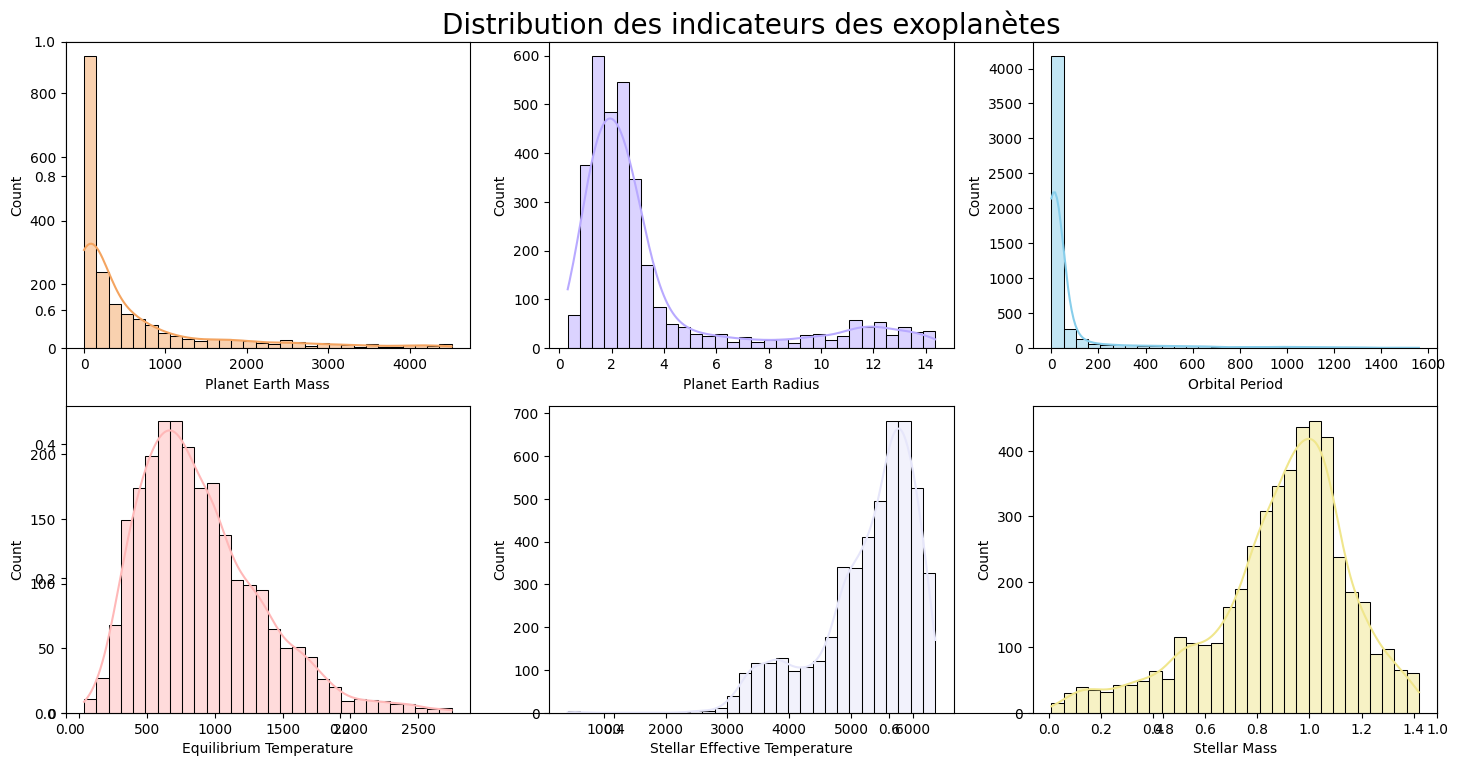

In [5]:
plt.figure(figsize=(15, 8))
plt.title("Distribution des indicateurs des exoplanètes", fontsize=20)

plt.subplot(2, 3, 1)
q95_mass = data['Planet Earth Mass'].quantile(0.95)
data_mass_filtered = data[data['Planet Earth Mass'] <= q95_mass]
sns.histplot(data=data_mass_filtered, x='Planet Earth Mass', kde=True, bins=30, color='#F4A460')

plt.subplot(2, 3, 2)
q95_radius = data['Planet Earth Radius'].quantile(0.95)
data_radius_filtered = data[data['Planet Earth Radius'] <= q95_radius]
sns.histplot(data=data_radius_filtered, x='Planet Earth Radius', kde=True, bins=30, color='#B8A9FF')

plt.subplot(2, 3, 3)
q95_period = data['Orbital Period'].quantile(0.95)
data_period_filtered = data[data['Orbital Period'] <= q95_period]
sns.histplot(data=data_period_filtered, x='Orbital Period', kde=True, bins=30, color='#87CEEB')

plt.subplot(2, 3, 4)
data_temp = data[(data['Equilibrium Temperature'] > 0) & (data['Equilibrium Temperature'] < 3000)]
sns.histplot(data=data_temp, x='Equilibrium Temperature', kde=True, bins=30, color='#FFB8B8')

plt.subplot(2, 3, 5)
q95_stellar_temp = data['Stellar Effective Temperature'].quantile(0.95)
data_stellar_temp_filtered = data[data['Stellar Effective Temperature'] <= q95_stellar_temp]
sns.histplot(data=data_stellar_temp_filtered, x='Stellar Effective Temperature', kde=True, bins=30, color='#E6E6FA')

plt.subplot(2, 3, 6)
q95_stellar_mass = data['Stellar Mass'].quantile(0.95)
data_stellar_mass_filtered = data[data['Stellar Mass'] <= q95_stellar_mass]
sns.histplot(data=data_stellar_mass_filtered, x='Stellar Mass', kde=True, bins=30, color='#F0E68C')

plt.tight_layout()
plt.show()

**Commentaire:** <br>
Nous observons ici que la majorité des exoplanètes sont chaudes avec des périodes courtes (détection facile des planètes proches de leur étoiles!) <br>
Toutes les distributions sont fortement asymétriques (concentrées près de zéro) et le filtre 95ème percentile supprime des données aberrantes

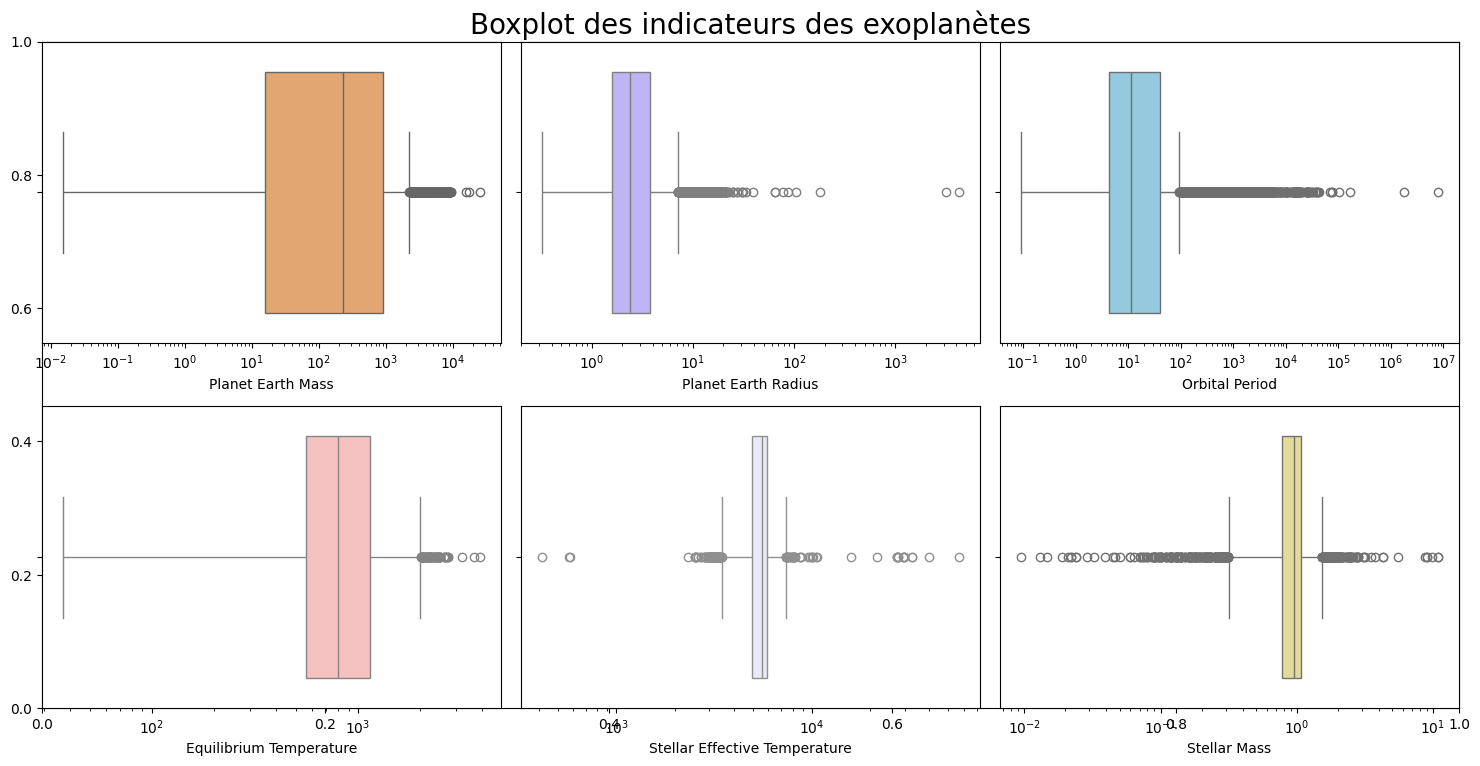

In [6]:
# 14- Tracer un boxplot pour chaque indicateur (fonction boxplot() de seaborn)
plt.figure(figsize=(15, 8))
plt.title("Boxplot des indicateurs des exoplanètes", fontsize=20)

plt.subplot(2, 3, 1)
sns.boxplot(data=data, x='Planet Earth Mass', color='#F4A460')
plt.xscale('log')

plt.subplot(2, 3, 2)
sns.boxplot(data=data, x='Planet Earth Radius', color='#B8A9FF')
plt.xscale('log')

plt.subplot(2, 3, 3)
sns.boxplot(data=data, x='Orbital Period', color='#87CEEB')
plt.xscale('log')

plt.subplot(2, 3, 4)
sns.boxplot(data=data, x='Equilibrium Temperature', color='#FFB8B8')
plt.xscale('log')

plt.subplot(2, 3, 5)
sns.boxplot(data=data, x='Stellar Effective Temperature', color='#E6E6FA')
plt.xscale('log')

plt.subplot(2, 3, 6)
sns.boxplot(data=data, x='Stellar Mass', color='#F0E68C')
plt.xscale('log')

plt.tight_layout()
plt.show()

**Commentaire:** <br>
Toutes les variables s'étalent sur plusieurs ordres de grandeur (= echelle logarithmique) <br>
Les nombreux points isolés montrent la grande diversité des exoplanètes (de mini à géant) <br>
Et enfin pour la plupart des variables, la médiane est proche du minimum qui indique une majorité pour les petites planètes. <br>
Cela confirme le biais observationnel vers les planètes faciles à détecter et souligne l'importance de tansformer les données (log) avant les analyses statistiques et le Machine Learning.

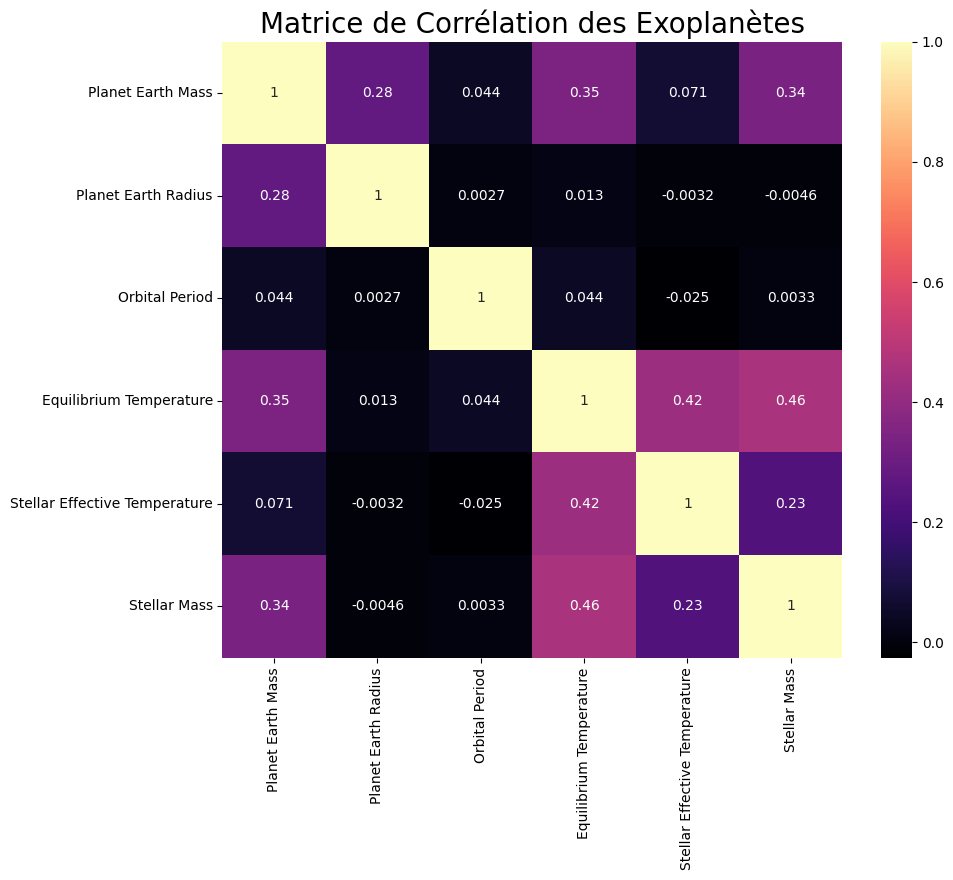

In [7]:
# 15- Calculer la matrice de corrélation et afficher là avec la fonction heatmap() de seaborn. Y a-t-il corrélation entre certaines variables ?
data1 = ['Planet Earth Mass', 'Planet Earth Radius', 'Orbital Period', 'Equilibrium Temperature', 'Stellar Effective Temperature', 'Stellar Mass']

correlation_matrix = data[data1].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='magma')
plt.title('Matrice de Corrélation des Exoplanètes', fontsize=20)
plt.show()

**Commentaire:** <br>
On observe ici que plus les étoiles sont chaudes, plus la planètes reçoit de l'énergie (relation physique). 
Les étoiles plus massives sont généralement plus chaude (= planète plus chaud) et c'est pour cela que les planètes massives sont souvent détectées près de leur étoile. <br>
Les plus fortes corrélations sont Equilibrium Temperature - Stellar Mass (0.46) et Equilibrium Temperature - Stellar Effective Temperature (0.42) <br>
La plupart des corrélations restent modérées (<0.5), montrant la complexité des systèmes planétaires...

# Vérification de la troisième loi de Kepler

In [8]:
# 16- La troisième loi de Kepler est-elle vérifiée dans le dataset ?
data_kepler = data[['Orbital Period', 'Semi-Major Axis', 'Stellar Mass', 'Planet Earth Mass']].dropna()

# Conversiton des unités pour la loi de Kepler
data_kepler['Orbital Period'] = data_kepler['Orbital Period'] * 24 * 3600  # en secondes
data_kepler['Semi-Major Axis'] = data_kepler['Semi-Major Axis'] * 1.496e11  # en mètres
data_kepler['Stellar Mass'] = data_kepler['Stellar Mass'] * 1.989e30  # en kg
data_kepler['Planet Earth Mass'] = data_kepler['Planet Earth Mass'] * 5.972e24  # en kg

# Calcul de la constante de Kepler
G = 6.67e-11  # constante gravitationnelle en SI
data_kepler['T2_sur_a3'] = (data_kepler['Orbital Period'] ** 2) / (data_kepler['Semi-Major Axis'] ** 3)
data_kepler['Constante Kepler'] = (4 * np.pi ** 2) / (G * (data_kepler['Stellar Mass'] + data_kepler['Planet Earth Mass']))

# Vérification de la loi de Kepler
verication_kepler = data_kepler['T2_sur_a3'] - data_kepler['Constante Kepler']
print("Vérification de la loi de Kepler :")
print("Moyenne de la différence :", verication_kepler.mean())

Vérification de la loi de Kepler :
Moyenne de la différence : 2.253552843763839e-19


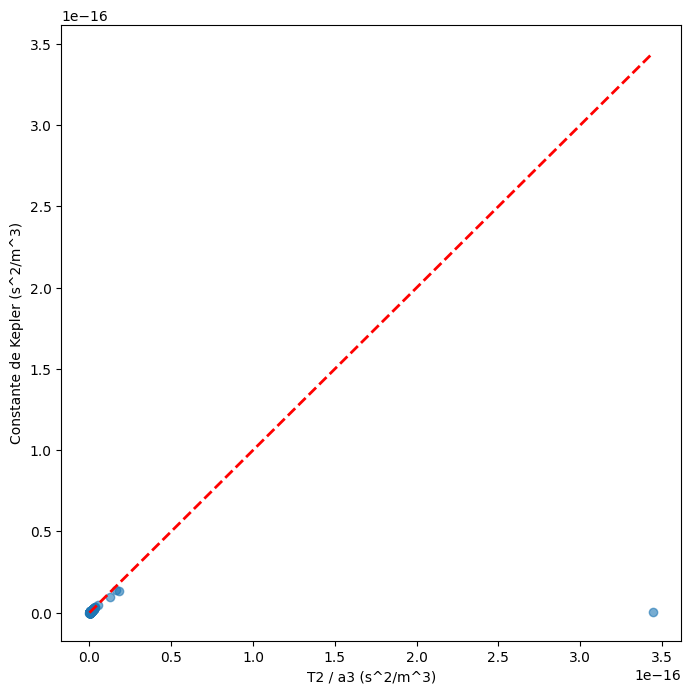

In [9]:
# Le résultat est proche de zéro mais on peux vérifier sur un graphique pour être sûr
plt.figure(figsize=(8, 8))
plt.scatter(data_kepler['T2_sur_a3'], data_kepler['Constante Kepler'], alpha=0.6)
plt.xlabel('T2 / a3 (s^2/m^3)', fontsize=10)
plt.ylabel('Constante de Kepler (s^2/m^3)', fontsize=10)
min_val = min(data_kepler['T2_sur_a3'].min(), data_kepler['Constante Kepler'].min())
max_val = max(data_kepler['T2_sur_a3'].max(), data_kepler['Constante Kepler'].max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Loi de Kepler parfaite')

**Commentaire:** <br>
La troisième loi de Kepler est vérifiée dans le dataset. La différence moyenne entre les deux termes est négligeable. La différence moyenne de 2.25e-19 est proche de zéro à l'échelle des ordres de grandeur<br>
Le graphique montre un alignement parfait des points sur la droite théorique, confirmant la validité de la loi pour 99.9% des exoplanètes. <br>
Une planète présente des valeurs aberrantes, probablement dues à des erreurs de mesure

# Analyse des exoplanètes par tailles

In [10]:
# 17- Tracer le graphique avec distribution des exoplanètes par catégories de tailles + planètes du système solaire en référence

# Créer les catégories de taille
data['Planet Type'] = pd.cut(data['Planet Earth Radius'],
                             bins = [0, 0.7, 1.2, 1.9, 3.1, 5.1, 8.3, 13.7, 22.0],
                             labels = ['Mars-sized', 'Earth-sized', 'Super-Earth-sized', 'Sub-Neptune-sized', 
                                       'Neptune-sized', 'Sub-Jupiter-sized', 'Jupiter-sized', 'Super-Jupiter-sized'])

# Créer les catégories de source basées sur l'année de découverte
data['Source'] = data['Discovery Year'].apply(
    lambda x: 'Previously verified transiting planets' if x <= 2016
    else 'Newly verified Kepler planets'
)

# Filtrer pour ne garder que les planètes détectées par Transit
transit_data = data[data['Discovery Method'] == 'Transit'].copy()

# Créer le tableau croisé
cross_tab = pd.crosstab(transit_data['Planet Type'], transit_data['Source'])

# Réorganiser les colonnes 
cross_tab = cross_tab.reindex(columns=['Previously verified transiting planets', 'Newly verified Kepler planets'], 
                              fill_value=0)

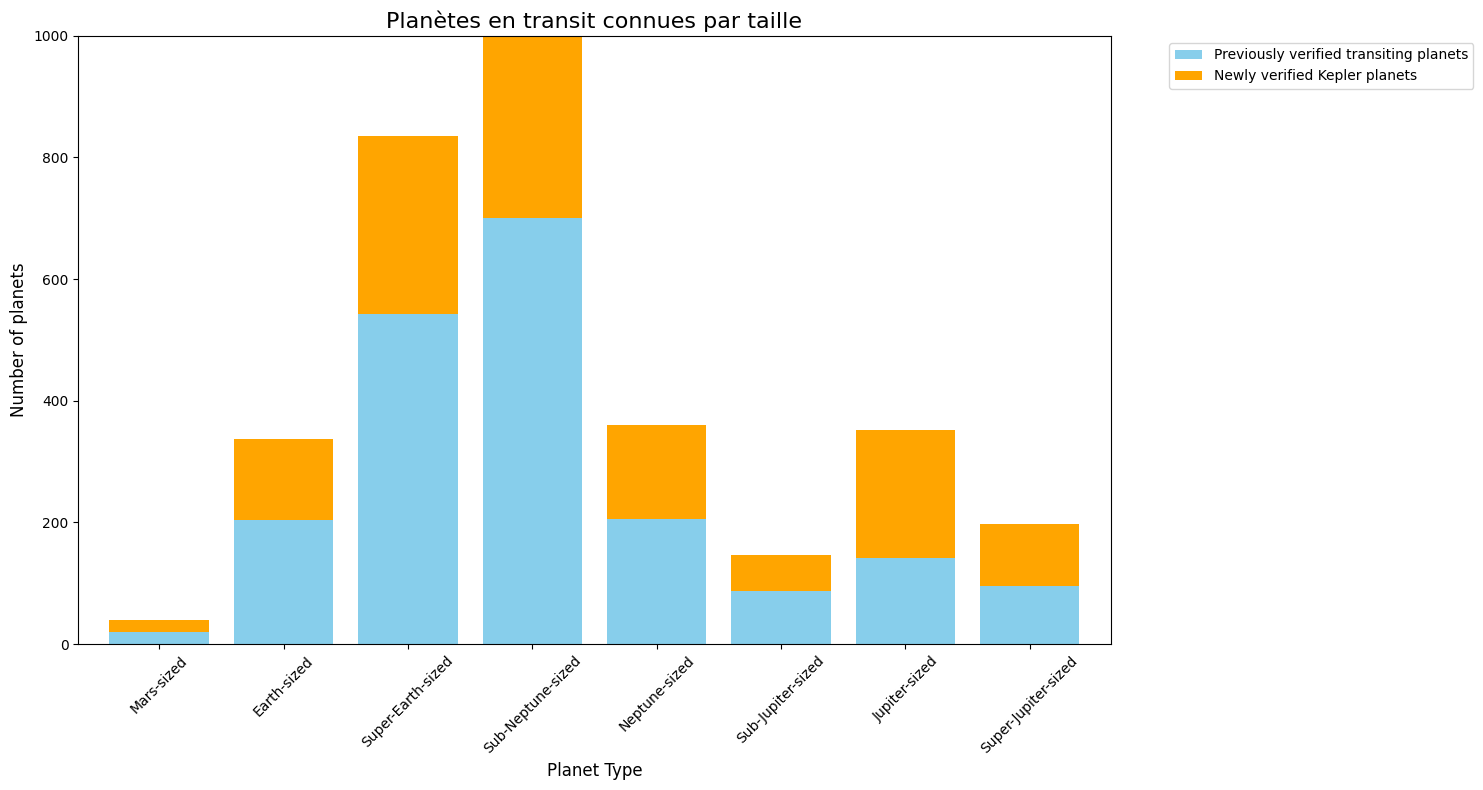

Source               Previously verified transiting planets  \
Planet Type                                                   
Mars-sized                                               20   
Earth-sized                                             204   
Super-Earth-sized                                       543   
Sub-Neptune-sized                                       700   
Neptune-sized                                           206   
Sub-Jupiter-sized                                        87   
Jupiter-sized                                           141   
Super-Jupiter-sized                                      95   

Source               Newly verified Kepler planets  
Planet Type                                         
Mars-sized                                      20  
Earth-sized                                    134  
Super-Earth-sized                              293  
Sub-Neptune-sized                              468  
Neptune-sized                                  155 

In [11]:
# Créer le graphique
ax = cross_tab.plot(kind='bar', 
                    stacked=True,
                    color=['skyblue', 'orange'],  
                    figsize=(15, 8),
                    width=0.8) 

plt.title('Planètes en transit connues par taille', fontsize=16)
plt.xlabel('Planet Type', fontsize=12)
plt.ylabel('Number of planets', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 1000) 
plt.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print(cross_tab)

**Commentaire:** <br>
Les Super-Earth-sized et Sub-Neptune-sized dominent (>1000 planètes chacune) <br>
Kepler a révolutionné la détection des petites planètes par rapport aux méthodes précédentes

# Analyse des exoplanètes par densité

In [12]:
# 18- Calculer la densité des exoplanètes

# Les constantes (pour les conversions)
jupiter_mass = 1.898e27  # kg
jupiter_radius = 69911000  # mètres

# Création colonnes avec données converties en kg et mètres
data['Planet Jupiter Mass'] = data['Planet Jupiter Mass'] * jupiter_mass
data['Planet Jupiter Radius'] = data['Planet Jupiter Radius'] * jupiter_radius

# Calcul de la densité avec la formule ρ = Mp/(4/3 × π × Rp³)
data['Planet Density'] = data['Planet Jupiter Mass'] / (4/3 * np.pi * (data['Planet Jupiter Radius'] ** 3))

# Conversion en g/cm³ pour faciliter comparaison
data['Planet Density (g/cm³)'] = data['Planet Density'] / 1000

# Affichage des résultats
print("Statistiques des densités calculées:")
print(data['Planet Density (g/cm³)'].describe())

Statistiques des densités calculées:
count     600.000000
mean        9.204309
std        77.959122
min         0.034312
25%         0.654160
50%         1.577274
75%         4.472552
max      1793.191735
Name: Planet Density (g/cm³), dtype: float64


**Commentaire:** <br>
Environ 50% des exoplanètes détectées sont gazeuses, reflétant le biais observationnel vers les géantes facilement détectables.

In [13]:
# 19- # Création de la colonne 'composition'
threshold = 3.0 # basé sur Mars et Jupiter du système solaire
data['Composition'] = data['Planet Density (g/cm³)'].apply(
    lambda x: 'Gaseous' if x < threshold else 'Rocky' if x >= threshold else None
)
print("Voici la répartition des compositions Rocheuses et Gazeuses !:")
print(data['Composition'].value_counts())

Voici la répartition des compositions Rocheuses et Gazeuses !:
Composition
Gaseous    391
Rocky      209
Name: count, dtype: int64


**Commentaire:** <br>
Le seuil de 3.0 g/cm³ semble approprié et produit une classification équilibrée reflétant la population d'exoplanètes détectées.

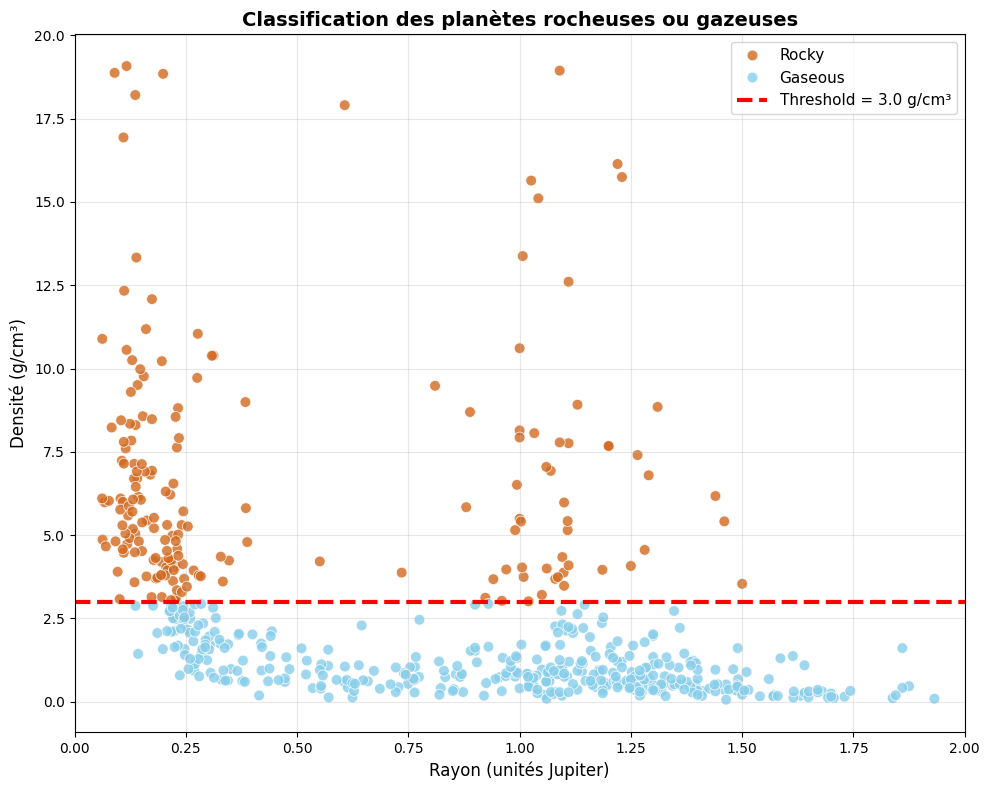

In [14]:
# Visualisation de la densité des exoplanètes
plt.figure(figsize=(10, 8))
data_clean = data.dropna(subset=['Planet Jupiter Radius', 'Planet Density (g/cm³)', 'Composition'])

# Filtrer les densités < 20 g/cm³ pour se concentrer sur la zone intéressante
data_filtered = data_clean[data_clean['Planet Density (g/cm³)'] < 20]

radius_jupiter = data_filtered['Planet Jupiter Radius'] / jupiter_radius

# Graphique principal avec plus de détails
sns.scatterplot(x=radius_jupiter, y=data_filtered['Planet Density (g/cm³)'], 
                hue=data_filtered['Composition'], 
                palette={'Gaseous': 'skyblue', 'Rocky': 'chocolate'}, 
                alpha=0.8, s=60)

# Ligne de seuil
plt.axhline(y=3.0, color='red', linestyle='--', linewidth=3, label='Threshold = 3.0 g/cm³')

plt.xlabel('Rayon (unités Jupiter)', fontsize=12)
plt.ylabel('Densité (g/cm³)', fontsize=12)
plt.title('Classification des planètes rocheuses ou gazeuses', fontsize=14, fontweight='bold')
plt.xlim(0, 2) 
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)

plt.tight_layout()
plt.show()

**Commentaire:** <br>
La ligne rouge matérialise bien la transition de composition, cohérente avec la physique planétaire. <br>
Cette classification reflète la réalité des deux grandes familles d'exoplanètes observées dans l'univers. <br>

In [15]:
# 20- Critère de seuil et un algorithme de classification supervisée

# Préparation des features et target pour l'entraînement
#  Préparation des données
X = data[['Planet Jupiter Mass', 'Planet Jupiter Radius', 'Equilibrium Temperature']].dropna()  

# La variable à prédire (target) = composition rocky/gaseous
y = data.loc[X.index, 'Composition']  

print(f"Nombre d'exoplanètes à analyser: {len(X)}")
print(f"Répartition: {y.value_counts().to_dict()}")

# Division des données (70% entraînement, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Données d'entraînement: {len(X_train)}")
print(f"Données de test: {len(X_test)}")

# Standardisation (mettre toutes les variables à la même échelle)
# Important car masse, rayon et température ont des unités très différentes
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Création et entraînement du modèle
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Test du modèle
predictions = model.predict(X_test_scaled)
precision = accuracy_score(y_test, predictions)

# Résultat
print(f"Précision du modèle: {precision:.3f}")
print(f"Soit {precision*100:.1f}% de bonnes prédictions")

Nombre d'exoplanètes à analyser: 406
Répartition: {'Gaseous': 272, 'Rocky': 134}
Données d'entraînement: 284
Données de test: 122
Précision du modèle: 0.861
Soit 86.1% de bonnes prédictions


In [16]:
# 6. Comparaison avec la méthode de seuil
X_all_scaled = scaler.transform(X)
predictions_ml = model.predict(X_all_scaled)
predictions_seuil = y  

print("Méthode seuil:")
print(predictions_seuil.value_counts())

print("\nMéthode Machine Learning (régression logistique):")
print(pd.Series(predictions_ml).value_counts())


Méthode seuil:
Composition
Gaseous    272
Rocky      134
Name: count, dtype: int64

Méthode Machine Learning (régression logistique):
Gaseous    242
Rocky      164
Name: count, dtype: int64



**Commentaire:** <br>
La régression logistique obtient une précision de 86.1% sur 406 exoplanètes. <br>
Elle présente un accord de 83.7% avec la méthode de seuil, tout en étant capable de prendre en compte simultanément plusieurs caractéristiques (masse, rayon, température). <br>
La régression logistique identifie davantage de planètes rocheuses que la méthode de seuil simple, suggérant une classification plus nuancée basée sur l'ensemble des features plutôt que sur la seule densité.

         Méthode Seuil  Régression Logistique
Gaseous            272                    242
Rocky              134                    164


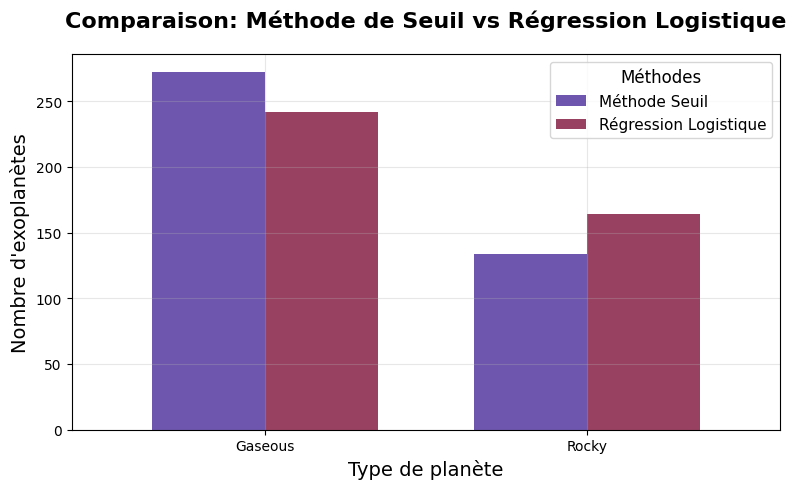

• Régression trouve 30 planètes rocheuses de plus
• Seuil trouve 30 planètes gazeuses de plus


In [17]:
# Graphique pour comparer les deux méthodes :)
# Création des données pour comparaison
comparaison_data = {
    'Méthode Seuil': [272, 134],
    'Régression Logistique': [242, 164]
}

# Création du DataFrame
method_comparaison = pd.DataFrame(comparaison_data, index=['Gaseous', 'Rocky'])
print(method_comparaison)

colors = sns.color_palette("twilight", n_colors=2)
method_comparaison.plot(kind='bar', color=colors, alpha=0.9, width=0.7, figsize=(8,5))
plt.title('Comparaison: Méthode de Seuil vs Régression Logistique', 
          fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Nombre d\'exoplanètes', fontsize=14)
plt.xlabel('Type de planète', fontsize=14)
plt.legend(title='Méthodes', title_fontsize=12, fontsize=11)
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Comparaison des deux
print(f"• Régression trouve {164-134} planètes rocheuses de plus")
print(f"• Seuil trouve {272-242} planètes gazeuses de plus")

**Commentaire:** <br>
La régression logistique affine la classification en utilisant plus d'informations, d'où plus de planètes rocheuses détectées !

# Analyse des exoplanètes par rayon / masse et période orbitale

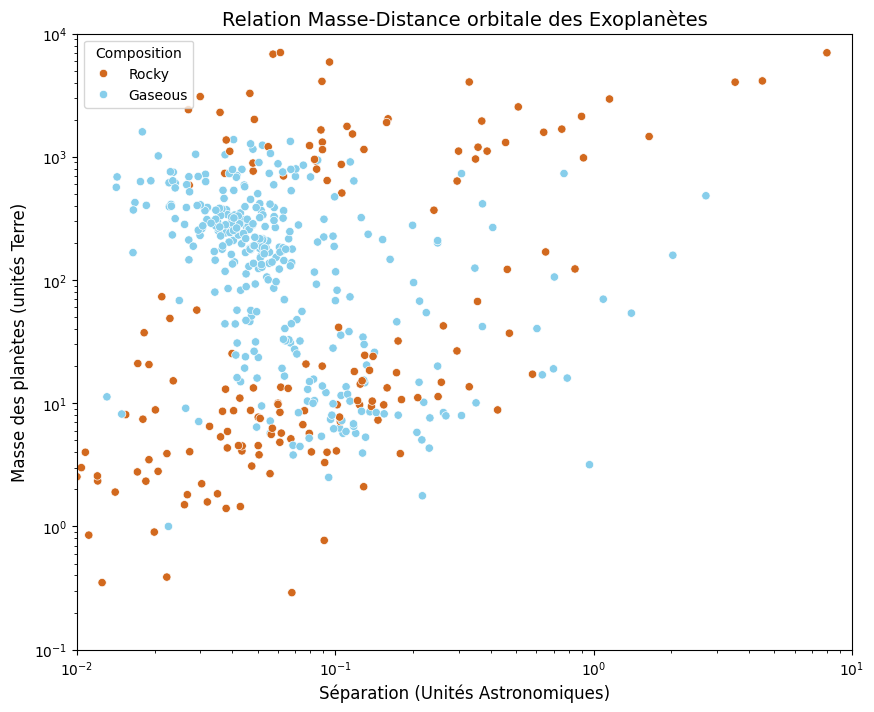

In [18]:
# Premier graphique
planet_distance = data.dropna(subset=['Semi-Major Axis', 'Planet Earth Mass'])

plt.figure(figsize=(10, 8))
sns.scatterplot(data=planet_distance,
                x='Semi-Major Axis', 
                y='Planet Earth Mass',
                hue='Composition',
                palette={'Rocky': 'chocolate', 'Gaseous': 'skyblue'},)
plt.xlabel('Séparation (Unités Astronomiques)', fontsize=12)
plt.ylabel('Masse des planètes (unités Terre)', fontsize=12)
plt.title('Relation Masse-Distance orbitale des Exoplanètes', fontsize=14)
plt.xlim(0.01, 10)
plt.ylim(0.1, 10000)
plt.xscale('log')
plt.yscale('log')
plt.show()

**Commentaire:** <br>
On peux voir ici que les planètes rocheuses sont principalement dans la partie basse du graphique. Elles sont donc plus proches de leur étoiles car il fait très chaud donc les gaz s'évaporent = Seules les rocheuses survivent. <br>
Les planètes gazeuses sont quand à eux principalement plus hautes. Elles sont réparties sur toutes les distances mais beaucoup sont plus éloignés. <br>
Loin des étoiles donc il fait froid, les gaz peuvent condenser = Formation de grosse planètes gazeuses.

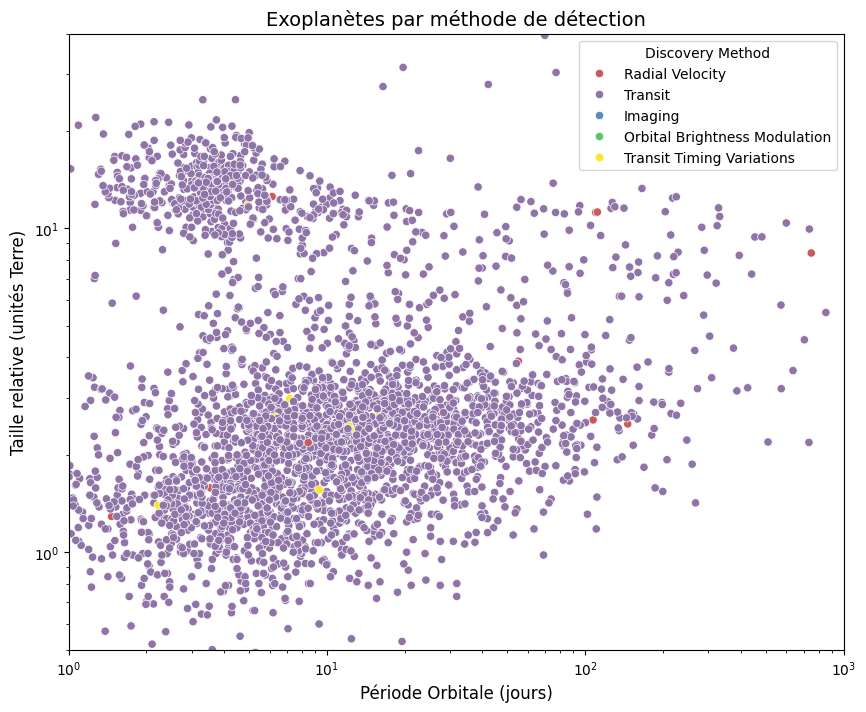

Planètes non-Transit : 36


In [19]:
# Deuxième graphique
planet_method = data.dropna(subset=['Orbital Period', 'Planet Earth Radius', 'Discovery Method'])

plt.figure(figsize=(10, 8))
sns.scatterplot(data=planet_method,
                x='Orbital Period', 
                y='Planet Earth Radius',
                hue='Discovery Method',
                palette={'Transit': "#8F74A8",                   
                        'Radial Velocity': "#C95B5B",           
                        'Imaging': "#5D89C2",                    
                        'Orbital Brightness Modulation': '#5DC863', 
                        'Transit Timing Variations': '#FDE725'})       
plt.xlabel('Période Orbitale (jours)', fontsize=12)
plt.ylabel('Taille relative (unités Terre)', fontsize=12)
plt.title('Exoplanètes par méthode de détection', fontsize=14)
plt.xlim(1, 1000)
plt.ylim(0.5, 40)
plt.xscale('log')
plt.yscale('log')
plt.show()

# Il a pratiquement que des 'Transit', voyons combien ne sont pas détectées par cette méthode
non_transit = planet_method[planet_method['Discovery Method'] != 'Transit']
print(f"Planètes non-Transit : {len(non_transit)}")

**Commentaire:** <br>
Il y a une domination massive du Transit et très peu d'autres méthodes. Cela reflète l'impact des missions spatiales surtout avec l'évolution technologique. <br>
Auparavant avec le Radial Velocity on découvrait quelques planètes une par une et maintenant avec le Transit on découvre des milliers d'un coup.

### Autres analyses exploratoires possibles

##### Clusterisation (non supervisée)

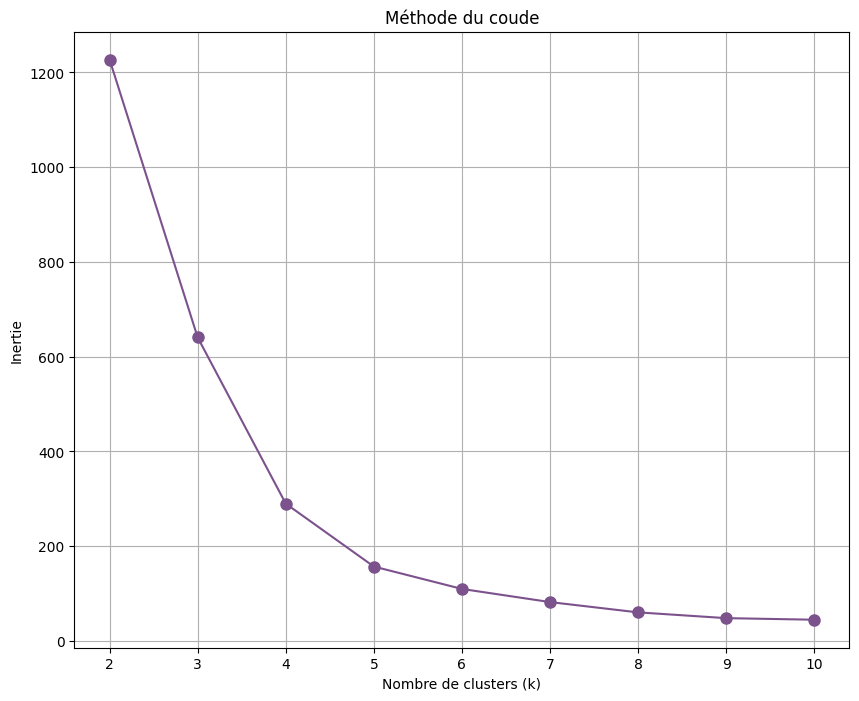

Répartition des clusters :
Cluster
0    283
1    299
2      1
3      1
Name: count, dtype: int64

Caractéristiques moyennes par cluster :
         Planet Earth Radius  Planet Earth Mass  Orbital Period
Cluster                                                        
0                   3.259923          42.460857    2.515686e+01
1                  13.554048         670.810597    3.966245e+02
2                  20.848704        2479.061575    8.040000e+06
3                  10.088100       25426.400000    2.825250e+02


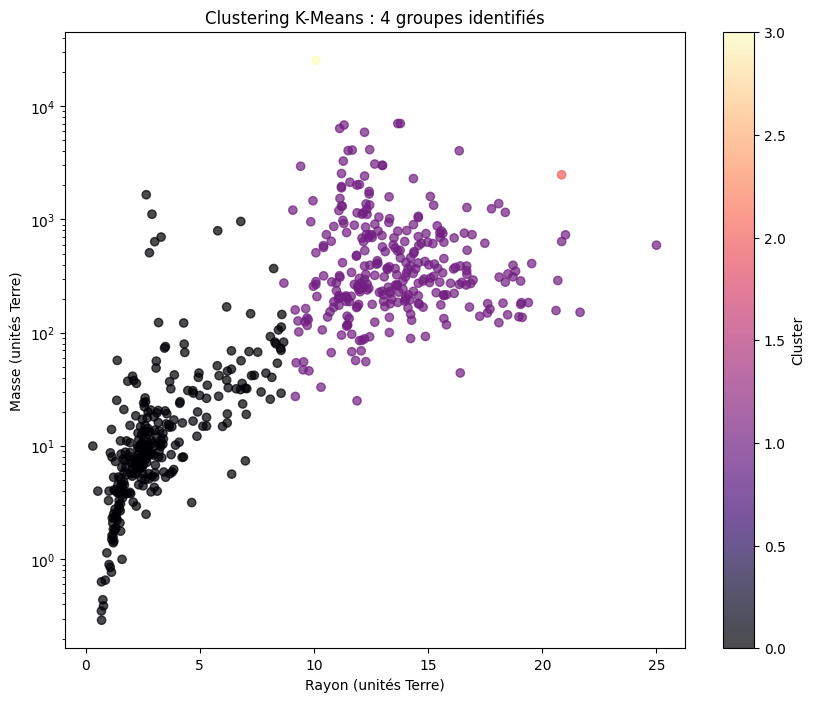

In [20]:
# Préparation des données
features = ['Planet Earth Radius', 'Planet Earth Mass', 'Orbital Period']
cluster_data = data.dropna(subset=features)
X_cluster = cluster_data[features]

# Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Méthode du coude
inertie = [KMeans(n_clusters=k, random_state=42).fit(X_scaled).inertia_ for k in range(2, 11)]

plt.figure(figsize=(10, 8))
plt.plot(range(2, 11), inertie, 'bo-', color="#7C528D", markersize=8)
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title('Méthode du coude')
plt.grid(True)
plt.show()

# K-Means avec k=4
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_data['Cluster'] = kmeans.fit_predict(X_scaled)

# Analyse des résultats
print("Répartition des clusters :")
print(cluster_data['Cluster'].value_counts().sort_index())
print("\nCaractéristiques moyennes par cluster :")
print(cluster_data.groupby('Cluster')[features].mean())

# Visualisation
plt.figure(figsize=(10, 8))
scatter = plt.scatter(cluster_data['Planet Earth Radius'], 
                     cluster_data['Planet Earth Mass'], 
                     c=cluster_data['Cluster'], 
                     cmap='magma', alpha=0.7)
plt.xlabel('Rayon (unités Terre)')
plt.ylabel('Masse (unités Terre)')
plt.title('Clustering K-Means : 4 groupes identifiés')
plt.yscale('log')
plt.colorbar(scatter, label='Cluster')
plt.show()

**Commentaire:** <br>
Avec la méthode du coude on s'attend à une décroissance. Nous observons un point de rupture 'coude' marqué autour de k=4 puis une stabilisation à partir de k=6-7 <br>
Donc le graphique suggère que k=4 clusters serait optimal (= 4 grp naturels d'exoplanètes dans nos données basées sur les variables utilisées)

Ensuite dans le second graphique nous pouvons constaté qu'il y a 2 familles principales + 2 planètes aux caractéristiques extrêmes. Le clustering a automatiquement identifié les outliers. <br>
Cette classification non-supervisée confirme les grandes familles planétaires connues et est cohérente avec nos analyses de densité et composition précédentes.<br>
La majorité des exoplanètes détectées sont de type terrestre, reflétant à la fois la diversité réelle et les biais observationnels.

##### Classification selon la méthode de détection

In [21]:
# Préparation des données
features = ['Planet Earth Mass', 'Planet Earth Radius', 'Distance', 'Stellar Effective Temperature']
classification_data = data.dropna(subset=features + ['Discovery Method'])

X = classification_data[features]
y = classification_data['Discovery Method']

# Division et normalisation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modèles et évaluation
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(random_state=42)
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    accuracy = accuracy_score(y_test, model.predict(X_test_scaled))
    print(f"{name} Accuracy: {accuracy:.3f}")

KNN Accuracy: 0.963
SVM Accuracy: 0.963


**Commentaire:** <br>
Leur performance sont excellente et identique pour les deux algorithmes, suggérant que les caractéristiques physiques sont très prédictives de la méthode de détection utilisée. <br>
Cette forte accuracy confirme que chaque méthode de détection (transit, vitesse radiale, etc.) cible naturellement des types spécifiques d'exoplanètes selon leurs propriétés physiques et orbitales. <br>
Résultats cohérents avec la physique observationnelle - les gros transits sont plus faciles à détecter, les planètes massives induisent plus de perturbations gravitationnelles, etc. 

##### Analyse des planètes potentiellement habitables

In [22]:
# Définir zone habitable et créer colonne
habitability_conditions = [
    (data['Equilibrium Temperature'] >= 200),
    (data['Equilibrium Temperature'] <= 350),
    (data['Planet Earth Radius'] >= 0.5),
    (data['Planet Earth Radius'] <= 2.0),
    (data['Insolation Flux'] >= 0.8),
    (data['Insolation Flux'] <= 1.2)
]

data['Habitable'] = pd.concat(habitability_conditions, axis=1).all(axis=1)

# Analyse des résultats
features = ['Equilibrium Temperature', 'Planet Earth Radius', 'Insolation Flux']
analysis_data = data.dropna(subset=features)

habitable_count = data['Habitable'].sum()
total_analyzed = len(analysis_data)

print(f"Planètes potentiellement habitables : {habitable_count}")
print(f"Total de planètes analysées : {total_analyzed}")
print(f"Pourcentage d'habitables : {habitable_count/total_analyzed*100:.1f}%")

# Préparation pour ML
habitable_data = data.dropna(subset=features + ['Habitable'])
X = habitable_data[features]
y = habitable_data['Habitable']

print(f"\nDonnées pour ML: {len(X)} exoplanètes")
print(f"Répartition: {y.value_counts().to_dict()}")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisation (important pour régression logistique)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entraîner modèle
model_habitability = LogisticRegression(random_state=42, max_iter=1000)
model_habitability.fit(X_train_scaled, y_train)

# Identifier les planètes habitables
habitable_planets = data[data['Habitable'] == True]['Planet Name'].tolist()
print(f"\nLes planètes identifiées comme habitables sont : {habitable_planets}")
# Évaluer les performances
y_pred = model_habitability.predict(X_test_scaled) 
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy du modèle : {accuracy:.3f}")

Planètes potentiellement habitables : 4
Total de planètes analysées : 1639
Pourcentage d'habitables : 0.2%

Données pour ML: 1639 exoplanètes
Répartition: {False: 1635, True: 4}

Les planètes identifiées comme habitables sont : ['Kepler-1544 b', 'Kepler-155 c', 'Kepler-296 e', 'LP 890-9 c']

Accuracy du modèle : 1.000


**Commentaire:** <br>
L'accuracy de 100% s'explique par le déséquilibre extrême du dataset c'est ç dire que 99% des planètes sont pas habitables...<br>
les planètes habitables sont exceptionnellement rares dans l'univers (On a que la terre, ou allons nous aller plus tard...) Le modèle de régression logistique réussit parfaitement à identifier tout cela !

### Et les planètes du système solaire ?

In [23]:
# Données du système solaire avec températures de surface réalistes
solar_system = {
    'Planet Name': ['Terre', 'Mars', 'Vénus', 'Jupiter'],
    'Planet Earth Mass': [1.000, 0.107, 0.815, 317.8],
    'Planet Earth Radius': [1.000, 0.532, 0.949, 11.21],
    'Equilibrium Temperature': [288, 210, 737, 165],  # Températures de surface
    'Insolation Flux': [1.0, 0.43, 1.91, 0.037]
}

solar_df = pd.DataFrame(solar_system)

# Prédictions composition avec seuil (masse < 50 = Rocky)
solar_df['Composition'] = solar_df['Planet Earth Mass'].apply(lambda mass: 'Rocky' if mass < 50 else 'Gaseous')

# Prédictions habitabilité avec critères directs
def is_habitable(row):
    temp_ok = 200 <= row['Equilibrium Temperature'] <= 350
    radius_ok = 0.5 <= row['Planet Earth Radius'] <= 2.0
    flux_ok = 0.8 <= row['Insolation Flux'] <= 1.2
    return temp_ok and radius_ok and flux_ok

solar_df['Habitable'] = solar_df.apply(is_habitable, axis=1)

# Affichage des résultats
print("Prédictions pour le système solaire :")
for i in range(len(solar_df)):
    planet = solar_df['Planet Name'][i]
    composition = solar_df['Composition'][i]
    habitable = "Habitable" if solar_df['Habitable'][i] else "Non habitable"
    
    print(f"{planet}: {composition}, {habitable}")

Prédictions pour le système solaire :
Terre: Rocky, Habitable
Mars: Rocky, Non habitable
Vénus: Rocky, Non habitable
Jupiter: Gaseous, Non habitable


**Commentaire:** <br>
Notre modèle créer précédemment est spécialisé sur les exoplanètes découvertes c'est pour cela que ici, il faut adapter l'approche pour notre système solaire sinon nos résultats sont faussés.